In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer

In [2]:
PERFORMANCE_CSV = "/Users/melaniefayne/Desktop/mtihani/mtihani_api/mtihaniapi/exam/management/commands/output/performance_list.csv"
df = pd.read_csv(PERFORMANCE_CSV)

print(df.shape)
df.head()

(11, 18)


,Grade-7,Skill-Evaluating,Skill-Remembering,Skill-Understanding,Strand-Living Things and Their Environment (G7),Strand-Scientific Investigation (G7),SubStrand-Human Reproductive System,SubStrand-Introduction to Integrated Science,SubStrand-Laboratory Apparatus and Instruments,id,student_id,student_name,avg_score,completion_rate,class_avg_difference,avg_expectation_level,best_5_answer_ids,worst_5_answer_ids
0,187.5,75.0,100.0,100.0,100.0,87.5,100.0,75.0,100.0,11,1,Grace Wanjiru,91.67,100.0,23.49,Exceeding,"[44, 43, 45]","[45, 43, 44]"
1,137.5,50.0,75.0,75.0,75.0,62.5,75.0,50.0,75.0,12,2,Kevin Omondi,66.67,100.0,-1.51,Meeting,"[47, 46, 48]","[48, 46, 47]"
2,200.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,13,3,Faith Mwikali,100.00,100.0,31.82,Exceeding,"[42, 41, 40]","[40, 41, 42]"
3,125.0,50.0,75.0,50.0,75.0,50.0,75.0,50.0,50.0,14,4,Brian Otieno,58.33,100.0,-9.85,Approaching,"[35, 36, 34]","[34, 36, 35]"
4,187.5,75.0,100.0,100.0,100.0,87.5,100.0,75.0,100.0,15,5,Linet Cherono,91.67,100.0,23.49,Exceeding,"[50, 49, 51]","[51, 49, 50]"


In [3]:
exclude = ["id", "student_id", "student_name", "avg_expectation_level",
           "best_5_answer_ids", "worst_5_answer_ids"]

skill_cols = [col for col in df.columns if col.startswith("Skill-")]
grade_cols = [col for col in df.columns if col.startswith("Grade-")]
strand_cols = [col for col in df.columns if col.startswith("Strand-")]
sub_strand_cols = [col for col in df.columns if col.startswith("SubStrand-")]

feature_cols = [col for col in df.columns if col not in exclude]
X = df[feature_cols].fillna(0)

print(X.shape)
X.head()

(11, 12)


,Grade-7,Skill-Evaluating,Skill-Remembering,Skill-Understanding,Strand-Living Things and Their Environment (G7),Strand-Scientific Investigation (G7),SubStrand-Human Reproductive System,SubStrand-Introduction to Integrated Science,SubStrand-Laboratory Apparatus and Instruments,avg_score,completion_rate,class_avg_difference
0,187.5,75.0,100.0,100.0,100.0,87.5,100.0,75.0,100.0,91.67,100.0,23.49
1,137.5,50.0,75.0,75.0,75.0,62.5,75.0,50.0,75.0,66.67,100.0,-1.51
2,200.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.00,100.0,31.82
3,125.0,50.0,75.0,50.0,75.0,50.0,75.0,50.0,50.0,58.33,100.0,-9.85
4,187.5,75.0,100.0,100.0,100.0,87.5,100.0,75.0,100.0,91.67,100.0,23.49


In [4]:
label_encoder=LabelEncoder()
df['avg_expectation_level'].value_counts()

avg_expectation_level
Exceeding      4
Approaching    3
Meeting        2
Below          2
Name: count, dtype: int64

Text(0.5, 1.0, 'Average Grade (Lowest to Highest)')

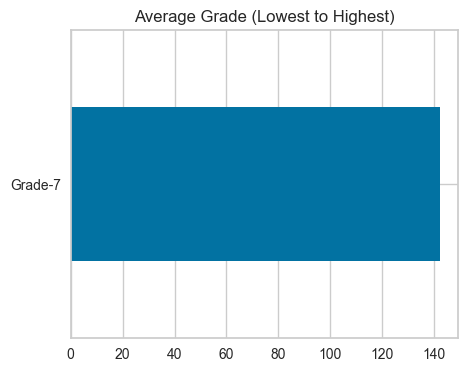

In [5]:
df[grade_cols].mean().sort_values().plot(kind="barh", figsize=(5, 4))
plt.title("Average Grade (Lowest to Highest)")

Text(0.5, 1.0, 'Average Skills Scores (Lowest to Highest)')

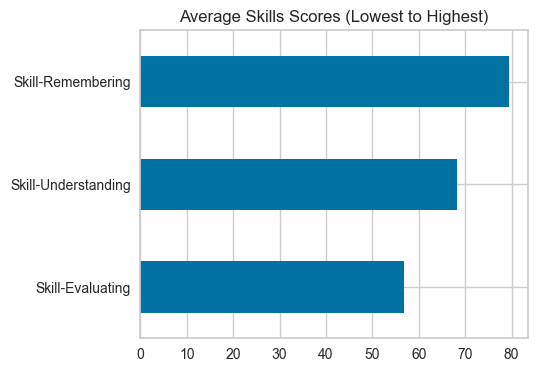

In [6]:
df[skill_cols].mean().sort_values().plot(kind="barh", figsize=(5, 4))
plt.title("Average Skills Scores (Lowest to Highest)")

Text(0.5, 1.0, 'Average Strand Scores (Lowest to Highest)')

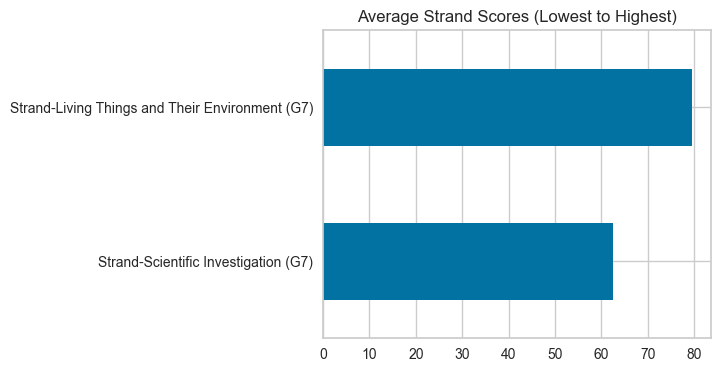

In [7]:
df[strand_cols].mean().sort_values().plot(kind="barh", figsize=(5, 4))
plt.title("Average Strand Scores (Lowest to Highest)")

Text(0.5, 1.0, 'Average Sub Strand Scores (Lowest to Highest)')

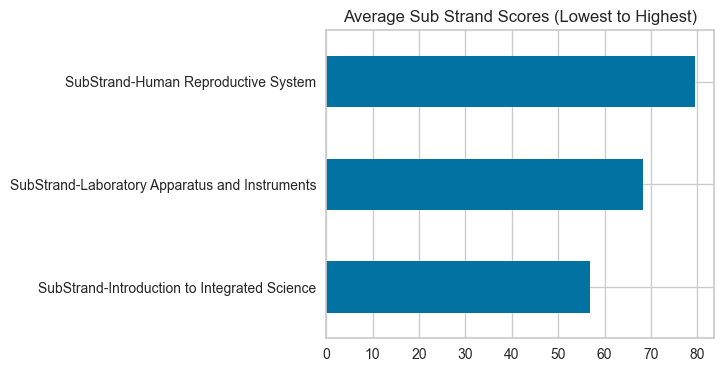

In [8]:
df[sub_strand_cols].mean().sort_values().plot(kind="barh", figsize=(5, 4))
plt.title("Average Sub Strand Scores (Lowest to Highest)")

In [9]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

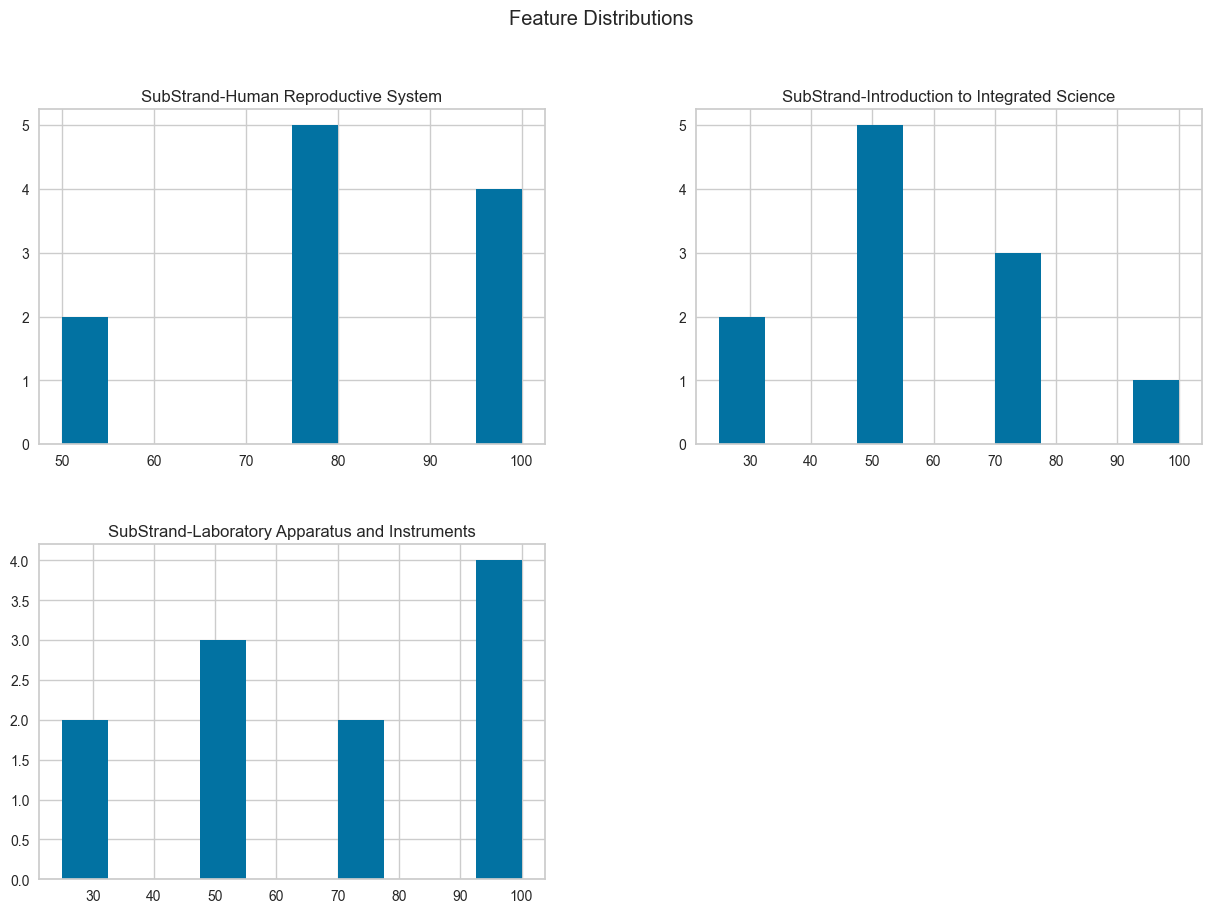

In [10]:
# Distribution plots
df[sub_strand_cols].hist(figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()

Most plots show two bars — likely because the dataset has distinct groups (e.g. struggling vs excelling students) - confirms: clustering is a good idea ✅
Distribution Shape
	•	If a topic has:
	•	All students grouped in one bar → uniform mastery
	•	Split bars → wide performance gap
	•	Spread out across 3+ bars → natural skill stratification
Flag topics with:
	•	High spread = “Varied student understanding — might need differentiated instruction”
	•	Single peak at low scores = “Everyone is struggling — consider reteaching”
	•	Single peak at high scores = “Everyone has mastered — good to move on”

Interesting Outliers
	•	E.g. "Acids, Bases and Indicators" or "Pressure" — if one bar is high and others are empty, that means students either:
	•	Universally struggled
	•	Or universally mastered that topic

<Axes: >

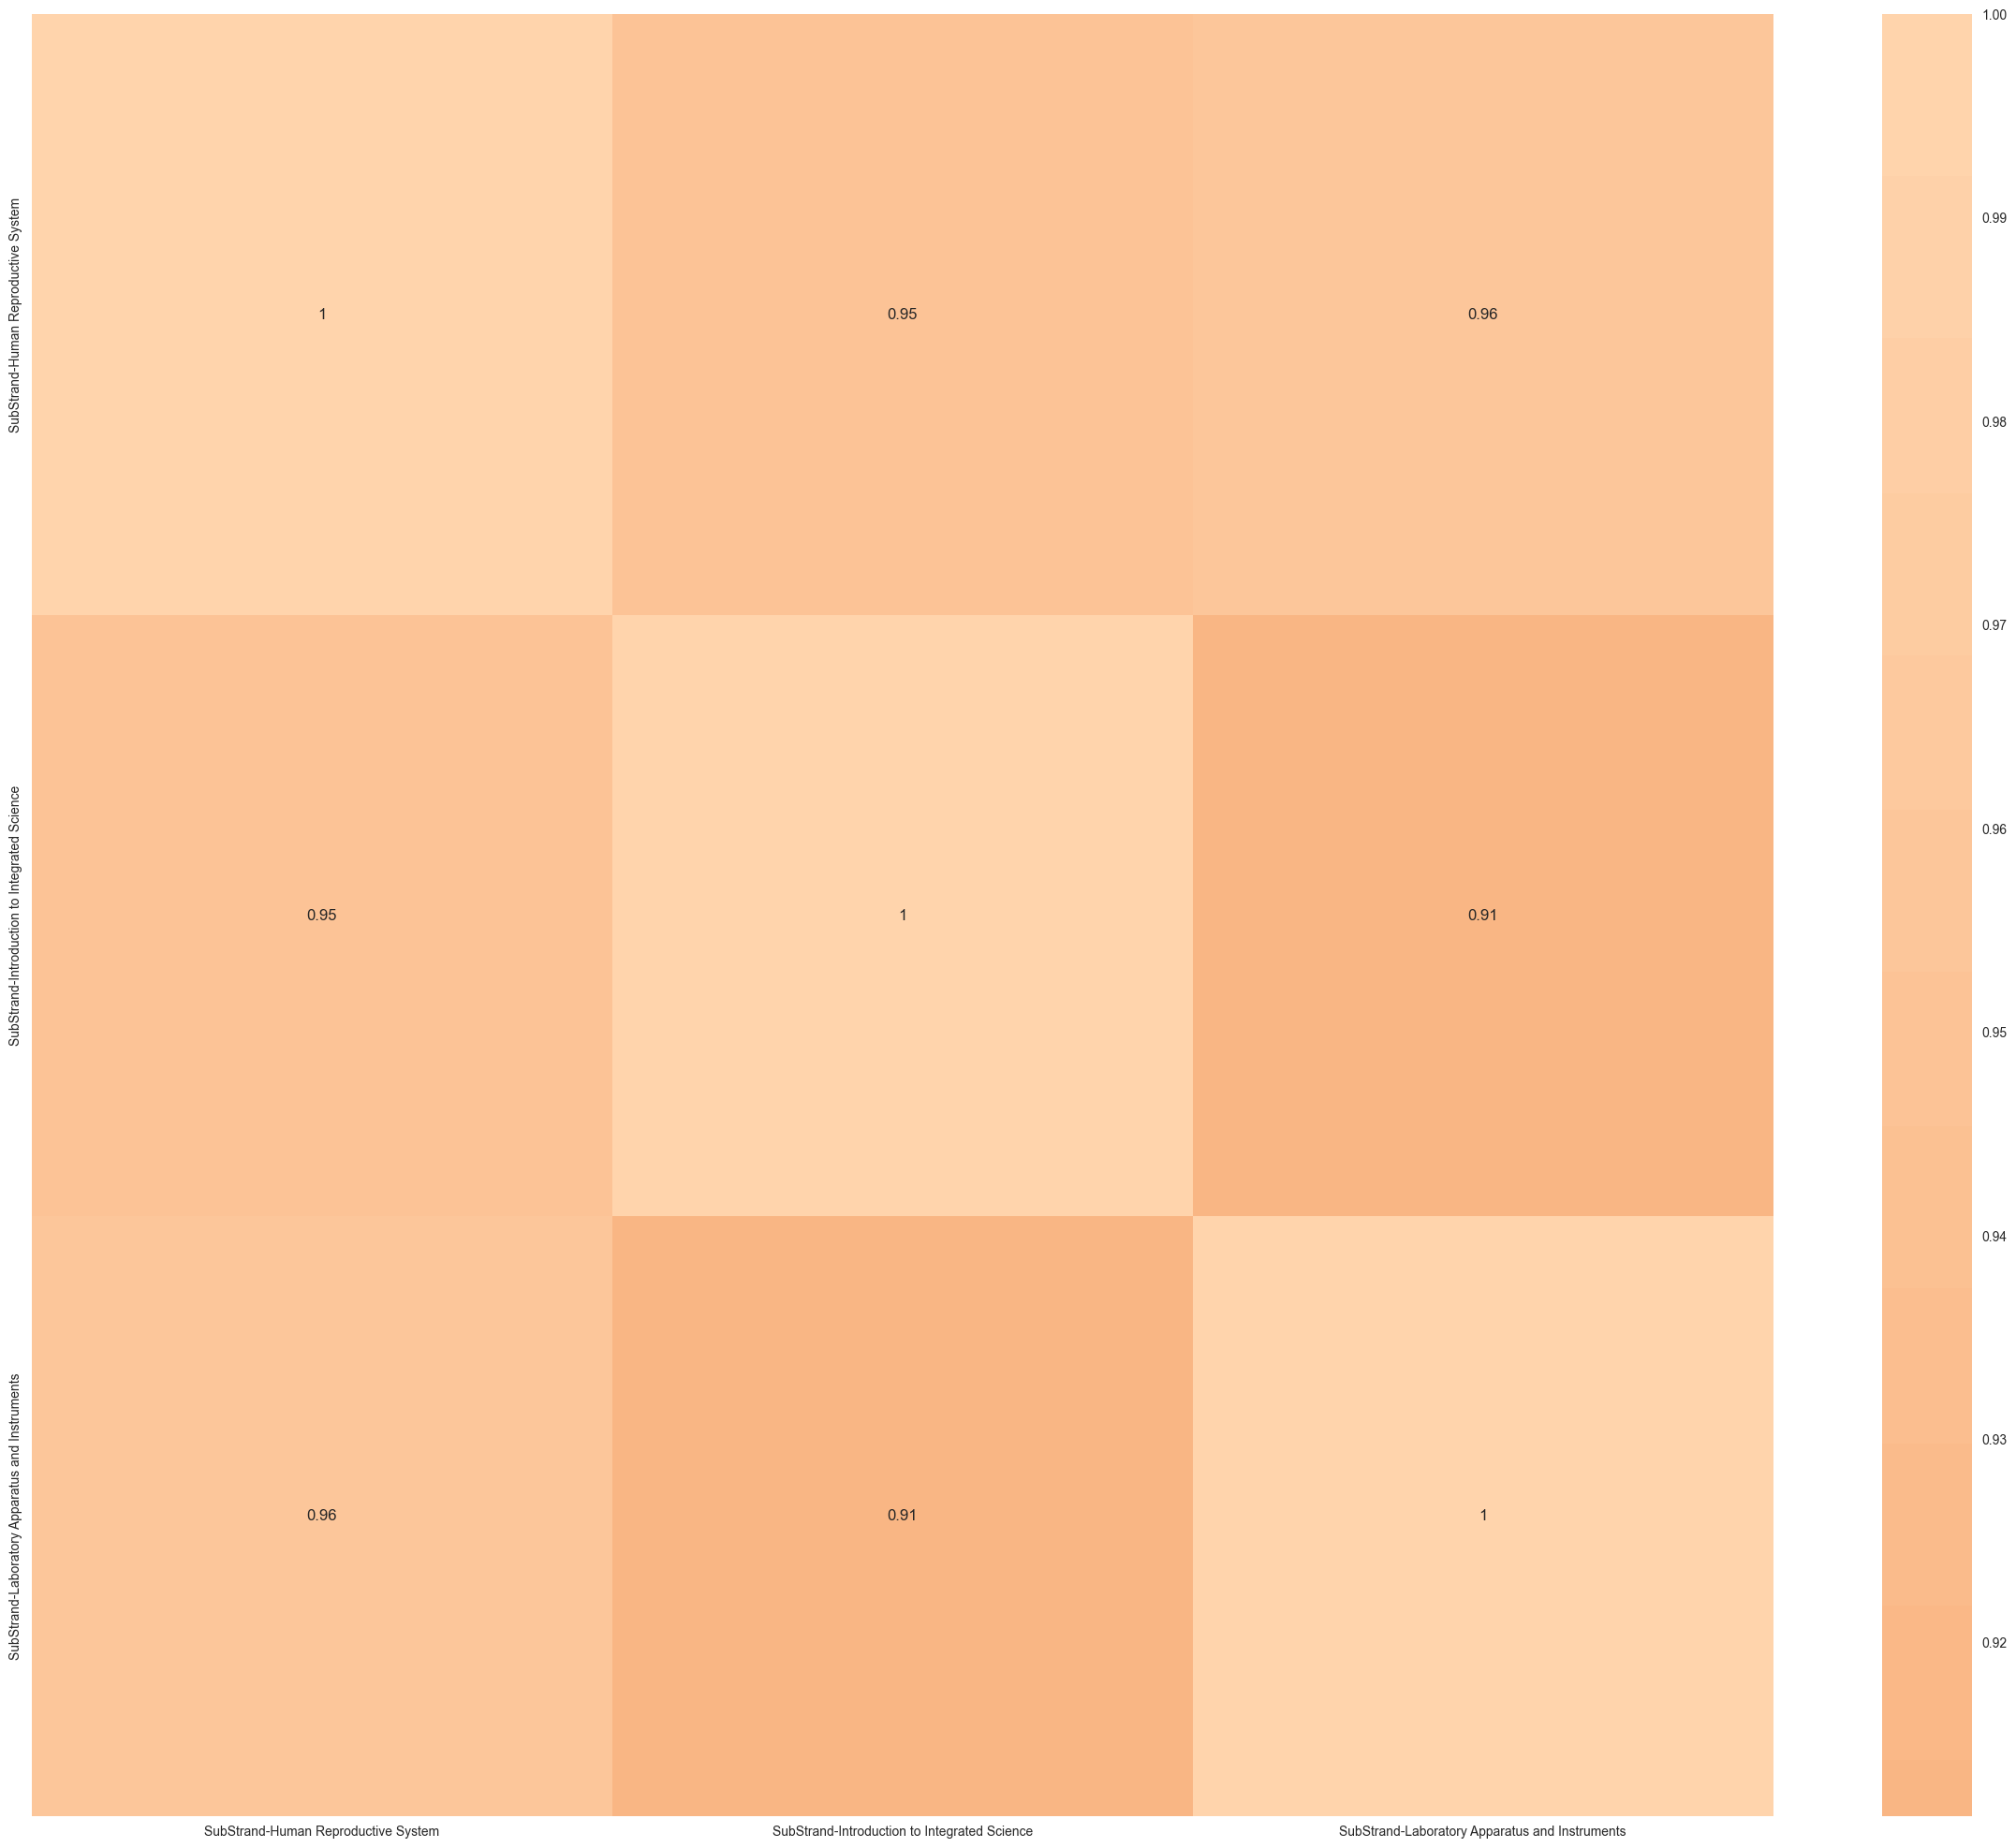

In [11]:
# Correlation heatmap
corrmat= df[sub_strand_cols].corr()
plt.figure(figsize=(30,25))
sns.heatmap(corrmat,annot=True, center=0)

The Pearson correlation coefficient:
	•	+1.0 → Strong positive correlation
	•	0.0 → No correlation
	•	-1.0 → Strong negative correlation

⸻

If correlation is near 0.0 (e.g. 0.05):

Performance on this topic is randomly distributed — there’s no consistent pattern with overall performance or other skills.
“Students who performed well overall didn’t consistently do well or poorly on this topic — the results were scattered.”

⸻

🔻 If correlation is moderately negative (e.g. -0.3):

Higher overall performers tended to do worse on this topic.
“Interestingly, students who scored highly overall tended to underperform in this topic — it may require a different skill set.”

⸻

🔺 If correlation is strongly positive (e.g. 0.95):

Students who did well overall also did well here — this topic behaves like the rest (not an outlier).
These aren't worth highlighting — but they help benchmark the rest.

Text(0.5, 1.0, 'Student Strand Mastery Heatmap')

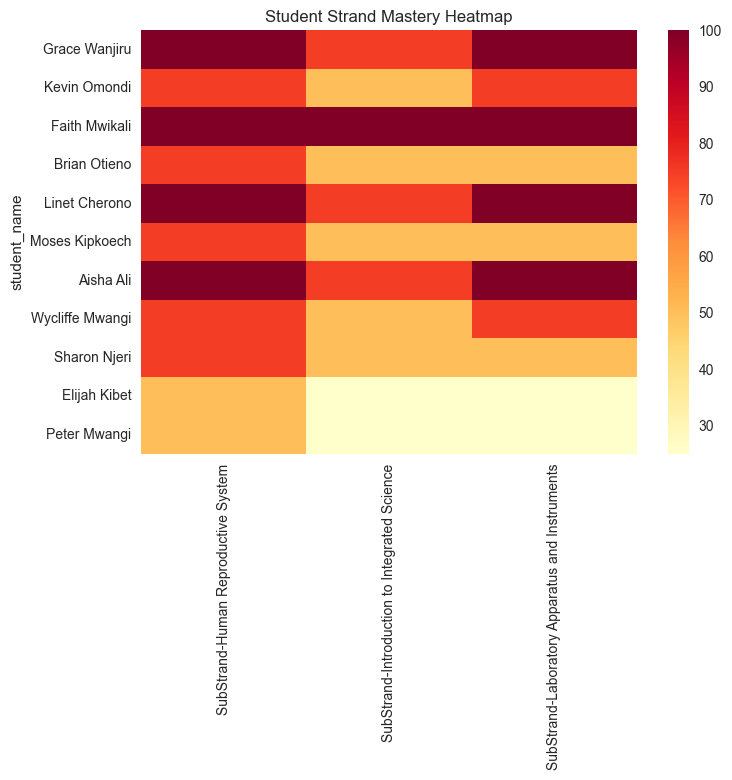

In [12]:
sns.heatmap(df.set_index("student_name")[sub_strand_cols], cmap="YlOrRd", cbar=True)
plt.title("Student Strand Mastery Heatmap")

Quickly shows who is strong/weak at what — great for seating plans or group formation

In [13]:
STRAND_SKILL_PERFORMANCE_CSV = "/Users/melaniefayne/Desktop/mtihani/mtihani_api/mtihaniapi/exam/management/commands/output/performance_strand_skills_list.csv"
strand_skill_df = pd.read_csv(STRAND_SKILL_PERFORMANCE_CSV)

print(strand_skill_df.shape)
strand_skill_df.head()

(16, 3)


,strand,bloom_skill,avg_score
0,Force and Energy,Application,2.85
1,Force and Energy,Comprehension,2.80
2,Force and Energy,Synthesis,3.20
3,Living Things and Their Environment,Analysis,2.70
4,Living Things and Their Environment,Comprehension,2.90


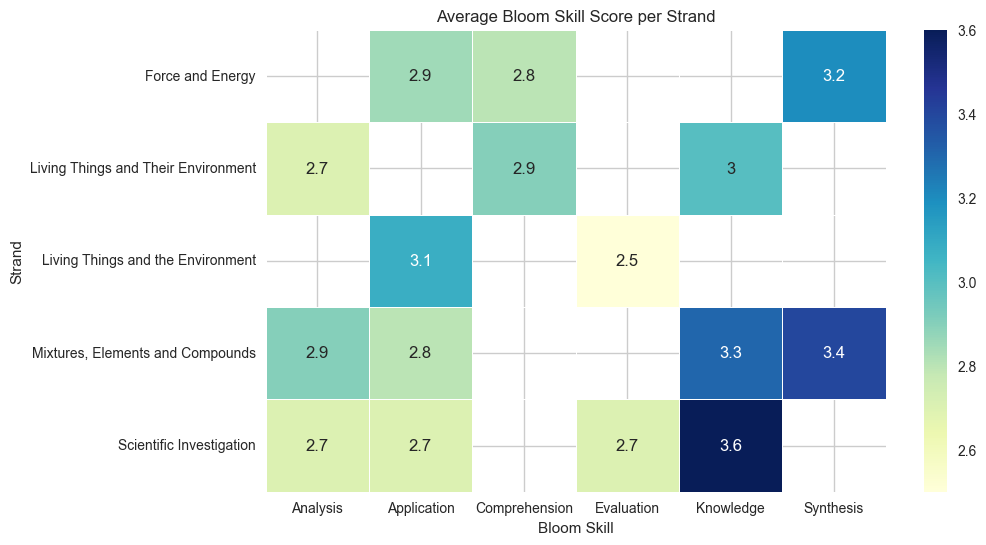

In [14]:
pivot = strand_skill_df.pivot(index="strand", columns="bloom_skill", values="avg_score")

import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", linewidths=.5)
plt.title("Average Bloom Skill Score per Strand")
plt.ylabel("Strand")
plt.xlabel("Bloom Skill")
plt.show()

As we can see, several of the features are highly correlated (> abs(0.5)).
We will address this problem by performing Dimenionality Reduction using Principal Compoent Analysis.

Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional space while preserving most of the variability in the data. PCA works by finding a new set of principal components that capture the maximum variance in the data. These principal components are linear combinations of the original features. The output of PCA is a transformed dataset where the new features (principal components) are ordered by the amount of variance they explain, with the first component explaining the most variance and subsequent components explaining decreasing amounts.

By retaining only a subset of these components, typically those that capture the majority of the variance, PCA effectively reduces the dimensionality of the dataset while retaining most of the information.

For this project, we will be reducing the dimensions to 4, meaning we retain only the first four principal components.

In [15]:
#Initiating PCA to reduce dimensions aka features to 4
pca = PCA(n_components=4)
pca.fit(X)
pca_ds = pd.DataFrame(pca.transform(X), columns=(["col1","col2", "col3", "col4"]))
pca_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,11.0,0.000000e+00,8.587087e+01,-1.291899e+02,-3.660313e+01,-4.923472,8.766326e+01,1.150463e+02
col2,11.0,-1.453383e-15,1.085712e+01,-2.007660e+01,-8.955173e+00,0.117433,5.712408e+00,1.478501e+01
col3,11.0,2.002439e-14,6.431687e+00,-1.266332e+01,-4.593581e+00,4.259344,5.172940e+00,6.086537e+00
col4,11.0,8.397323e-15,2.005146e-14,-1.421085e-14,-7.105427e-15,0.000000,2.842171e-14,3.552714e-14


/Users/melaniefayne/Desktop/mtihani/mtihani_api/.venv/lib/python3.11/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/melaniefayne/Desktop/mtihani/mtihani_api/.venv/lib/python3.11/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/melaniefayne/Desktop/mtihani/mtihani_api/.venv/lib/python3.11/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/melaniefayne/Desktop/mtihani/mtihani_api/.venv/lib/python3.11/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found 

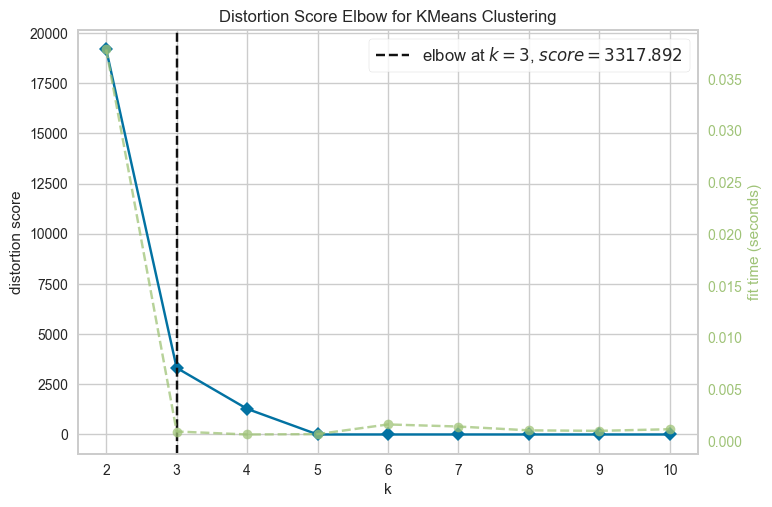

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
# Quick examination of elbow method to find numbers of clusters to make.
elbow_M = KElbowVisualizer(KMeans(), k=10, metric='distortion')
elbow_M.fit(pca_ds)
elbow_M.show()

In [17]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_ds)

centroids = kmeans.cluster_centers_
print("3D Cluster centroids:\n", centroids)

labels = kmeans.labels_
pca_ds["clusters"]= labels
df["clusters"]= labels

pca_ds

3D Cluster centroids:
 [[-2.39312641e+01  5.40901812e-01  1.44905101e+00  1.13686838e-14]
 [ 9.45090088e+01 -7.34843601e-01  2.86784200e-02 -8.88178420e-15]
 [-1.29189857e+02  1.17432672e-01 -3.67998437e+00  3.55271368e-14]]


,col1,col2,col3,col4,clusters
0,87.663260,5.712408,4.259344,-1.421085e-14,1
1,-4.923472,14.785014,-5.507178,2.842171e-14,0
2,115.046255,-20.076600,-12.663317,7.105427e-15,1
3,-36.603126,-8.955173,6.086537,0.000000e+00,0
4,87.663260,5.712408,4.259344,-1.421085e-14,1
5,-36.603126,-8.955173,6.086537,0.000000e+00,0
6,87.663260,5.712408,4.259344,-1.421085e-14,1
7,-4.923472,14.785014,-5.507178,2.842171e-14,0
8,-36.603126,-8.955173,6.086537,0.000000e+00,0
9,-129.189857,0.117433,-3.679984,3.552714e-14,2


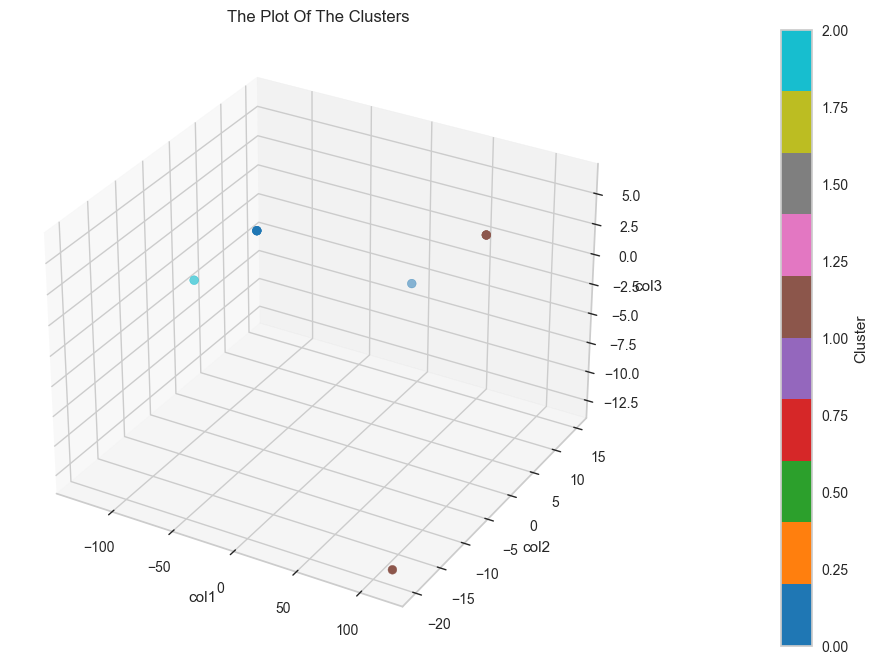

In [18]:
x = pca_ds["col1"]
y = pca_ds["col2"]
z = pca_ds["col3"]
clusters = pca_ds["clusters"]

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, s=40, c=clusters, marker='o', cmap='tab10')  # 'tab10' is good for categorical clusters

ax.set_title("The Plot Of The Clusters")
ax.set_xlabel("col1")
ax.set_ylabel("col2")
ax.set_zlabel("col3")

# Optional: Add colorbar to indicate cluster numbers
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("Cluster")

plt.show()

In [19]:
optimal_k = 3  # based on elbow

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

/var/folders/w8/zyq729hn5z19g054cq0v08y00000gn/T/ipykernel_45084/2482483732.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=df["clusters"], palette= pal)
/var/folders/w8/zyq729hn5z19g054cq0v08y00000gn/T/ipykernel_45084/2482483732.py:3: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  pl = sns.countplot(x=df["clusters"], palette= pal)


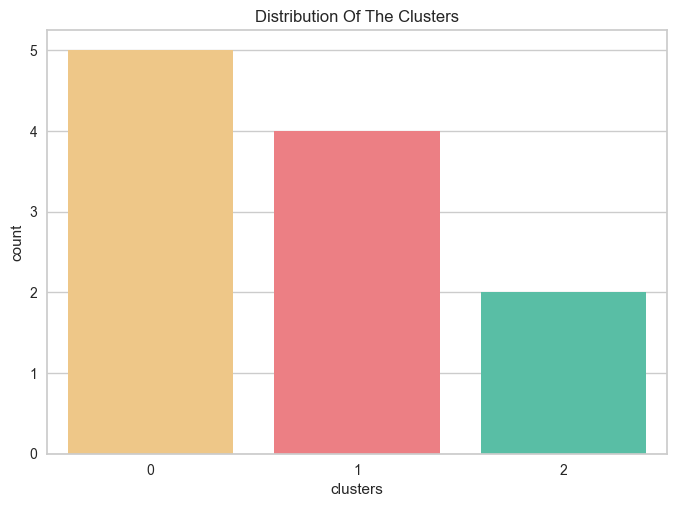

In [20]:
#Plotting countplot of clusters
pal = ["#FFCB77", "#FE6D73","#48CFAE","#227C9D"]
pl = sns.countplot(x=df["clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [21]:
# pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
# pl.set_title("Cluster's Profile Based On Income And Spending")
# plt.legend()
# plt.show()

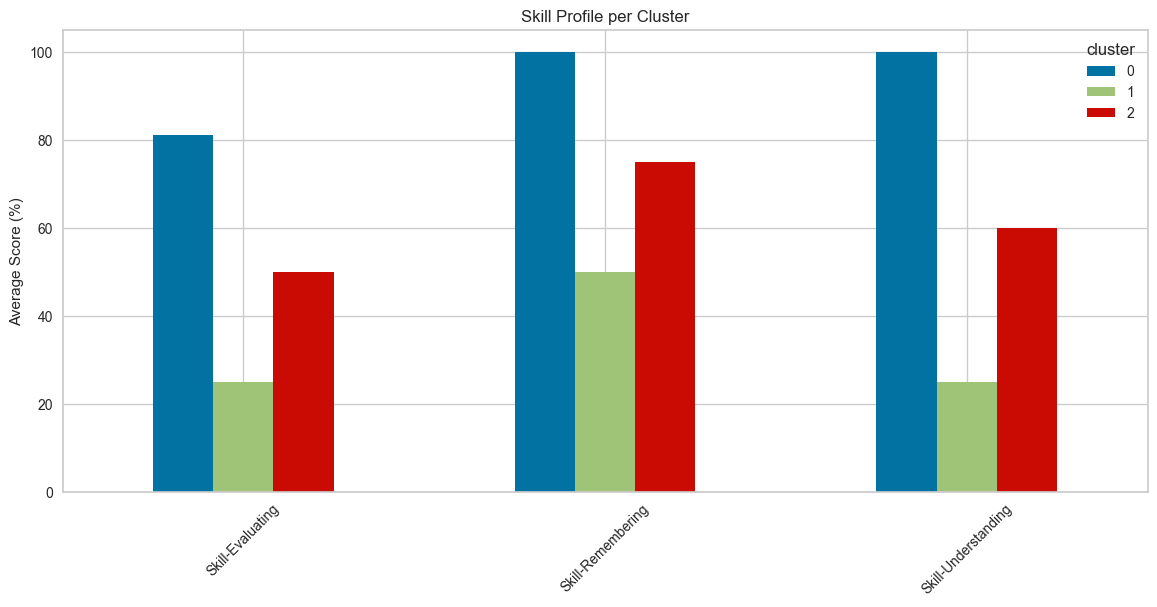

In [22]:
df.groupby("cluster")[skill_cols].mean().T.plot(kind="bar", figsize=(14, 6))
plt.title("Skill Profile per Cluster")
plt.ylabel("Average Score (%)")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Score Distribution by Cluster')

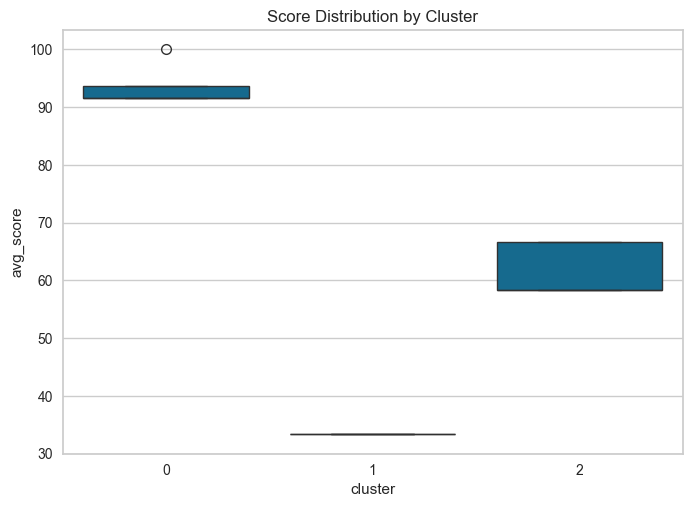

In [23]:
sns.boxplot(data=df, x="cluster", y="avg_score")
plt.title("Score Distribution by Cluster")

Text(0, 0.5, 'Student Count')

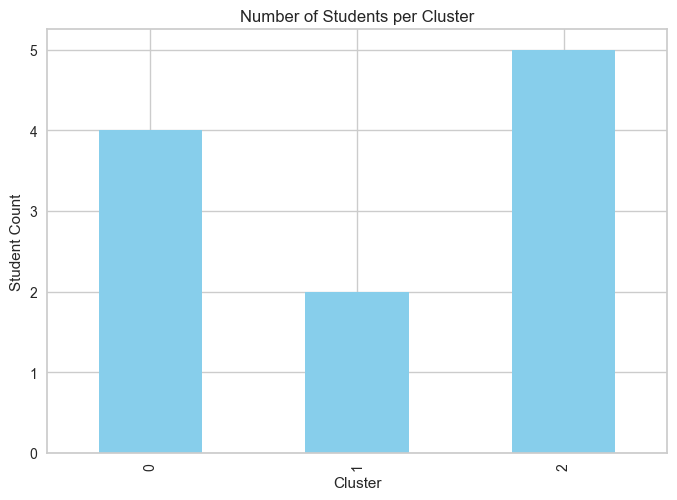

In [24]:
df["cluster"].value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.title("Number of Students per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Student Count")

In [25]:
cluster_summary = df.groupby("cluster")[feature_cols].mean()
cluster_summary["size"] = df["cluster"].value_counts()
cluster_summary

,Grade-7,Skill-Evaluating,Skill-Remembering,Skill-Understanding,Strand-Living Things and Their Environment (G7),Strand-Scientific Investigation (G7),SubStrand-Human Reproductive System,SubStrand-Introduction to Integrated Science,SubStrand-Laboratory Apparatus and Instruments,avg_score,completion_rate,class_avg_difference,size
cluster,,,,,,,,,,,,,
0,190.625,81.25,100.0,100.0,100.0,90.625,100.0,81.25,100.0,93.7525,100.0,25.5725,4
1,75.000,25.00,50.0,25.0,50.0,25.000,50.0,25.00,25.0,33.3300,100.0,-34.8500,2
2,130.000,50.00,75.0,60.0,75.0,55.000,75.0,50.00,60.0,61.6660,100.0,-6.5140,5
